In [4]:
import pandas as pd
import datetime
from functools import reduce
import numpy as np
import matplotlib.pyplot as plt

In [1]:
def calculate_corvar(df):
    com_name = price.columns[1:]
    var = []
    for com in com_name:
    #     Calculate the 5 day Variance
        data = []
        df_p = price[[com,'Date']]
        data.append(df_p)
        for i in range(1,6):
            df_p = price[[com]].shift(periods=i, axis=0)
            df_p['Date'] = price['Date'][:-i]
            data.append(df_p)
        # Combine all the data for different dates
        df_final = reduce(lambda left,right: pd.merge(left,right,on='Date',how='inner'), data)
        df_final = df_final.iloc[5:]
        df_final.index = df_final['Date']
        df_final = df_final.drop('Date',1)
        df_final['var'] = [np.var(df_final.iloc[i]) for i in range(df_final.shape[0])]
        result = df[df['Company']==com][['Date','score']]
        # Merge the data
        df_final['Date'] = df_final.index
        data1 = df_final[['var','Date']]
        data1.index = [i for i in range(data1.shape[0])]
        company = data1.merge(result,how='inner',on='Date')
        company['Com']=com
        # Calculate the Correlation of variance with the score
        company['Corr_var']=company['var'].corr(company['score'])
        var.append(company)
    var_result = pd.concat(var)
    return var_result

In [2]:
# Draw the grap
def draw_graph(var_result):  
    corr_result = var_result[['Com','Corr_var']].drop_duplicates(keep ='first')
    corr_result = corr_result.sort_values(by='Corr_var')
    plt.figure(figsize=(20,5))
    plt.axhline(0, color="k")
    x = corr_result['Com'].values
    y = corr_result['Corr_var'].values
    plt.bar(x,y)
    plt.title("Corelation of Score and 5-days price Volatility")
    plt.xticks(fontsize=10,rotation=270)
    plt.yticks(fontsize=10)
    plt.show()

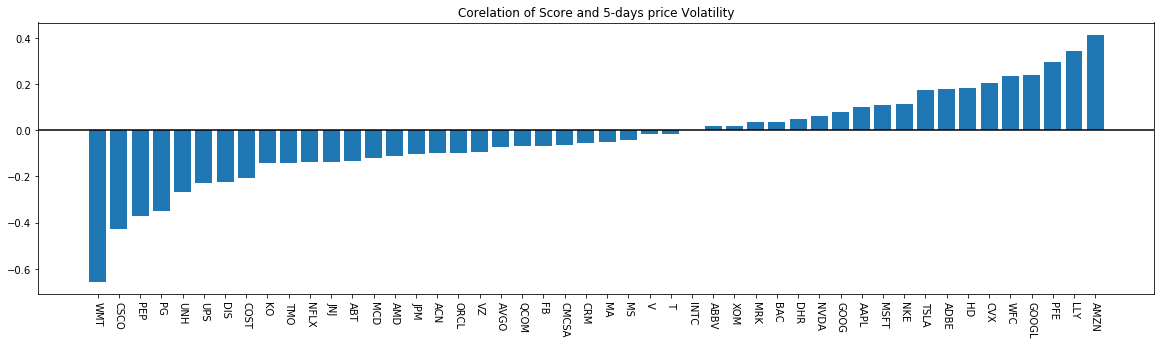

In [7]:
# Load and clean the data
df = pd.read_csv('event.csv')
df['Date'] = df['Date'].apply(lambda x: datetime.datetime.strptime(x[0:10], "%Y-%m-%d"))
price = pd.read_csv('prices.csv')
price['Date'] = price['Date'].apply(lambda x: datetime.datetime.strptime(x[0:10], "%Y-%m-%d"))
var_result = calculate_corvar(df)
draw_graph(var_result) 